In [1]:
import os
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

In [5]:
images.as_numpy_iterator().next()

b'data/images/71385900-e1d4-11ef-9a1f-760b117bc2d2.jpg'

In [6]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [7]:
images = images.map(load_image)

In [8]:
images.as_numpy_iterator().next()

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [40, 43, 36],
        [31, 30, 26],
        [ 4,  3,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [47, 50, 43],
        [37, 36, 32],
        [ 1,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [49, 52, 45],
        [44, 43, 39],
        [ 1,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [9]:
image_generator = images.batch(4).as_numpy_iterator()

In [10]:
plot_images = image_generator.next()

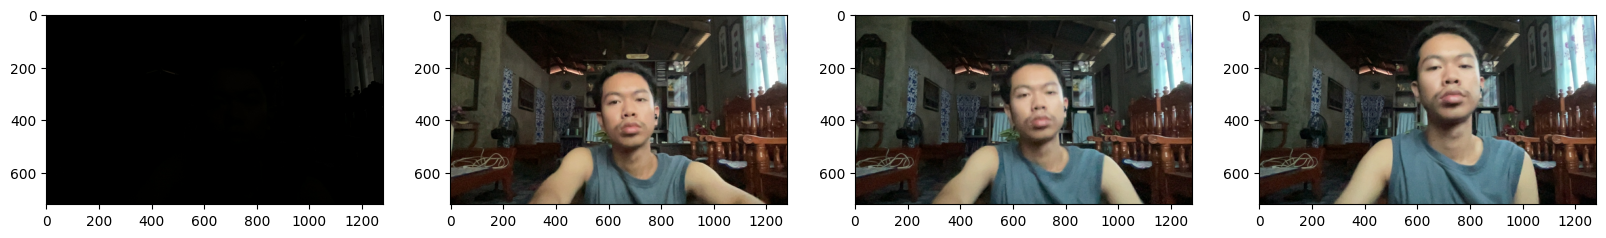

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
    
plt.show()

In [13]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split(".")[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [ ]:
########## AUGMENTATION

In [15]:
pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 3.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import albumentations as alb

In [18]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

In [27]:
img = cv2.imread(os.path.join('data', 'train', 'images', '92d37612-e1d4-11ef-bf96-760b117bc2d2.jpg'))

In [28]:
img

array([[[ 31,  41,  35],
        [ 38,  48,  42],
        [ 42,  52,  46],
        ...,
        [255, 253, 245],
        [254, 255, 246],
        [201, 202, 193]],

       [[ 26,  36,  30],
        [ 34,  44,  38],
        [ 40,  50,  44],
        ...,
        [255, 254, 246],
        [255, 255, 249],
        [212, 213, 204]],

       [[ 34,  44,  38],
        [ 38,  48,  42],
        [ 41,  51,  45],
        ...,
        [255, 253, 248],
        [255, 255, 249],
        [216, 219, 210]],

       ...,

       [[  0,   0,   0],
        [  1,   1,   1],
        [  0,   1,   1],
        ...,
        [  7,   7,   7],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  6,   5,   7],
        [  3,   2,   4],
        [  0,   1,   1],
        ...,
        [  7,   7,   7],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  9,   8,  10],
        [  3,   2,   4],
        [  0,   0,   0],
        ...,
        [  6,   6,   6],
        [  1,   1,   1],
        [  0,   0,   0]]

In [29]:
img.shape #this will define your divisors

(720, 1280, 3)

In [30]:
with open(os.path.join('data', 'train', 'labels', '92d37612-e1d4-11ef-bf96-760b117bc2d2.json'), 'r') as f:
    label = json.load(f)

In [31]:
label['shapes'][0]['points']

[[450.3260869565218, 152.93478260869563],
 [768.804347826087, 512.7173913043478]]

In [32]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords = list(np.divide(coords, [1280, 720, 1280, 720]))  #1280x720

In [33]:
coords

[0.35181725543478265,
 0.21240942028985504,
 0.6006283967391305,
 0.7121074879227052]

In [34]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [36]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

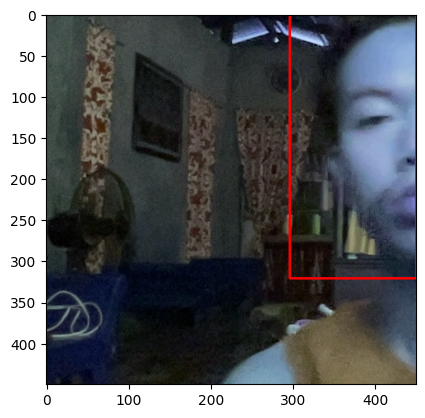

In [35]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
              (250,0,0), 2)

plt.imshow(augmented['image'])

In [39]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img=cv2.imread(os.path.join('data', partition, 'images', image))
        
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            
            coords = list(np.divide(coords, [1280, 720, 1280, 720]))  #1280x720
            
        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                
                annotation = {}
                annotation['image'] = image
                
                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0
                    
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f: 
                    json.dump(annotation, f)
                    
        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.99719769 0.32110506 0.86932403 0.99861109 0.        ].
x_max is less than or equal to x_min for bbox [0.99889606 0.55510265 0.92245805 0.99861109 0.        ].
x_max is less than or equal to x_min for bbox [0.99465013 0.19429348 0.74838656 0.98233694 0.        ].
x_max is less than or equal to x_min for bbox [0.99549931 0.18674517 0.79848844 0.92496979 0.        ].
x_max is less than or equal to x_min for bbox [0.99804688 0.25166062 0.84186631 0.99861109 0.        ].
x_max is less than or equal to x_min for bbox [0.99889606 0.31204709 0.8206535  0.99861109 0.        ].


In [46]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [47]:
train_images.as_numpy_iterator().next()

array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [4.9019611e-04, 4.9019611e-04, 4.9019611e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [6.1274513e-05, 6.1274513e-05, 6.1274513e-05],
        [0.0000000e+00

In [48]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [49]:
test_images.as_numpy_iterator().next()

array([[[0.34031862, 0.5050245 , 0.55992645],
        [0.32175246, 0.48645833, 0.54920346],
        [0.32224265, 0.48694852, 0.54969364],
        ...,
        [0.5514706 , 0.4377451 , 0.3122549 ],
        [0.5867034 , 0.4873162 , 0.3497549 ],
        [0.63909316, 0.54987746, 0.40134802]],

       [[0.3221201 , 0.48682597, 0.54172796],
        [0.344424  , 0.5091299 , 0.571875  ],
        [0.3254902 , 0.49019608, 0.5529412 ],
        ...,
        [0.6139706 , 0.5120098 , 0.38259804],
        [0.6164216 , 0.52144605, 0.38854167],
        [0.6435049 , 0.5566176 , 0.406924  ]],

       [[0.3322304 , 0.49693626, 0.55968136],
        [0.32610294, 0.4908088 , 0.5457108 ],
        [0.30802697, 0.47273284, 0.5276348 ],
        ...,
        [0.60851717, 0.5143995 , 0.38106617],
        [0.6557598 , 0.56164217, 0.4283088 ],
        [0.6846201 , 0.5865809 , 0.44246325]],

       ...,

       [[0.1740196 , 0.18921569, 0.175     ],
        [0.17015931, 0.17708333, 0.16476716],
        [0.2668505 , 0

In [43]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [50]:
val_images.as_numpy_iterator().next()

array([[[0.10251226, 0.20055147, 0.21623774],
        [0.19969362, 0.29773283, 0.31832108],
        [0.21985294, 0.3257353 , 0.36102942],
        ...,
        [0.14148284, 0.171875  , 0.19393383],
        [0.18308823, 0.21053922, 0.23406863],
        [0.13333334, 0.16139705, 0.17757353]],

       [[0.10618872, 0.20422794, 0.21991421],
        [0.14926471, 0.24129902, 0.26488972],
        [0.16470589, 0.26930147, 0.3050245 ],
        ...,
        [0.15471813, 0.19050245, 0.20863971],
        [0.14068627, 0.16954657, 0.19129902],
        [0.13639706, 0.16746323, 0.18259804]],

       [[0.07689951, 0.17493872, 0.190625  ],
        [0.12935048, 0.22738971, 0.24797794],
        [0.17359069, 0.27947304, 0.30692402],
        ...,
        [0.18161765, 0.2129902 , 0.2247549 ],
        [0.12469362, 0.16292892, 0.17126225],
        [0.13890931, 0.178125  , 0.18596813]],

       ...,

       [[0.8862745 , 0.7529412 , 0.6431373 ],
        [0.89411765, 0.7607843 , 0.6514706 ],
        [0.9005515 , 0

In [51]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        label = json.load(f)
        
    return[label['class']], label['bbox']

In [52]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [55]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

In [53]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [56]:
test_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.4219, 0.825 , 1.    ], dtype=float16))

In [54]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [57]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.4429, 0.4153, 1.    ], dtype=float16))

In [58]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3540, 3540, 840, 840, 660, 660)

In [59]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [60]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1000)
test = test.batch(8)
test = test.prefetch(4)

In [61]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [64]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0]], dtype=uint8),
 array([[0.3022 , 0.3892 , 1.     , 1.     ],
        [0.     , 0.1891 , 0.1533 , 1.     ],
        [0.     , 0.     , 0.6875 , 0.9365 ],
        [0.1636 , 0.07764, 0.944  , 1.     ],
        [0.     , 0.     , 0.3076 , 0.815  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

In [75]:
data_samples = train.as_numpy_iterator()

In [80]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


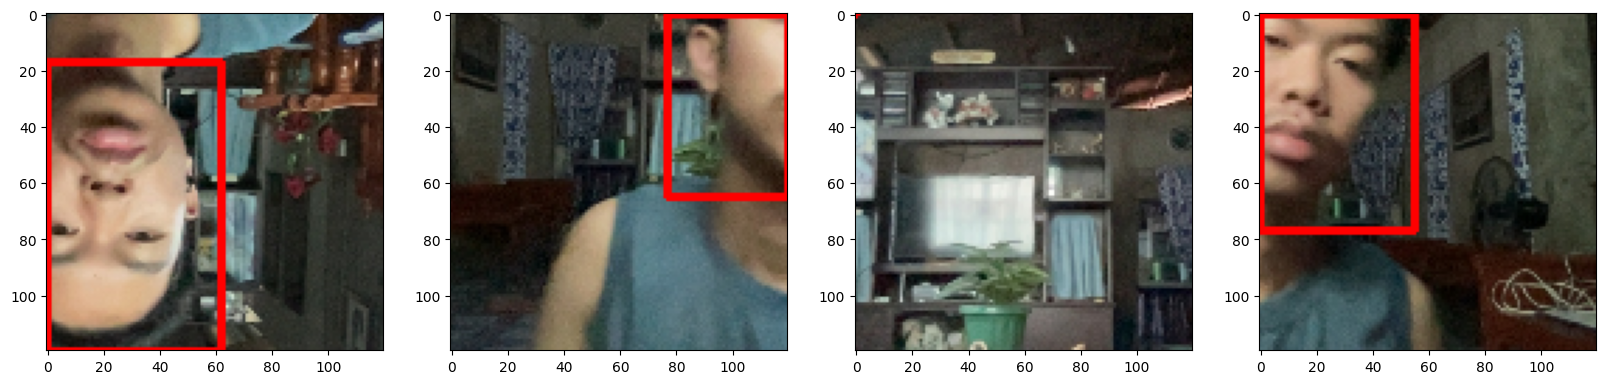

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx].copy()   #this has added .copy
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                  (255,0,0),2)
    
    ax[idx].imshow(sample_image)

In [ ]:
####################### MODEL BUILDING

In [82]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPool2D
from tensorflow.keras.applications import VGG16

In [83]:
vgg = VGG16(include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
def build_model():
    
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    f1 = GlobalMaxPool2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    f2 = GlobalMaxPool2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    
    return facetracker

In [86]:
facetracker = build_model()

In [87]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
X,y = train.as_numpy_iterator().next()
X.shape

(8, 120, 120, 3)

In [89]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


In [90]:
classes, coords

(array([[0.5860071 ],
        [0.6172837 ],
        [0.47406045],
        [0.55721277],
        [0.543035  ],
        [0.64492804],
        [0.5025108 ],
        [0.5497114 ]], dtype=float32),
 array([[0.52171445, 0.3935946 , 0.56248945, 0.20482166],
        [0.47276184, 0.44534296, 0.50518626, 0.27815834],
        [0.5548273 , 0.4988824 , 0.59813815, 0.26823947],
        [0.4878622 , 0.4706731 , 0.49216026, 0.2988677 ],
        [0.57746994, 0.3313299 , 0.5487378 , 0.24917328],
        [0.5071083 , 0.43513647, 0.46350893, 0.22379364],
        [0.48226494, 0.52952087, 0.44713613, 0.22128502],
        [0.5445023 , 0.39044395, 0.5198734 , 0.2607965 ]], dtype=float32))

In [91]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [113]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=batches_per_epoch,   # Apply decay every epoch
    decay_rate=1.0 - lr_decay,       # Adjust decay rate to match your original logic
    staircase=True                   # Discrete decay after each epoch
)

In [114]:
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [93]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2]-yhat[:,:2]))
    
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]
    
    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]
    
    delta_size = tf.reduce_sum(tf.square(w_true-w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [94]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [96]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=11.288795>

In [97]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6888066>

In [183]:
class FaceTracker(Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker
        
    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
        
    def train_step(self, batch, **kwargs):
        X,y = batch
        

        # Explicitly set the shape if known
        y0 = tf.ensure_shape(y[0], [None, 1])  # Assuming it's a binary classification label
        y1 = tf.ensure_shape(y[1], [None, 4])  # Assuming localization has 4 coordinates (x, y, w, h)

        # print("Shape of y0:", y0.shape)
        # print("Shape of y1:", y1.shape)
        
        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training= True)
            
            batch_classloss = self.closs(y0, classes)
            batch_localizationloss = self.lloss(tf.cast(y1, tf.float32), coords)
            
            total_loss = batch_localizationloss + 0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
            
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return{"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs):
        X,y = batch
        
        # Explicitly set the shape if known
        y0 = tf.ensure_shape(y[0], [None, 1])  # Assuming it's a binary classification label
        y1 = tf.ensure_shape(y[1], [None, 4])  # Assuming localization has 4 coordinates (x, y, w, h)

        # print("Shape of y0:", y0.shape)
        # print("Shape of y1:", y1.shape)
        
        classes, coords = self.model(X, training= False)
        
        batch_classloss = self.closs(y0, classes)
        batch_localizationloss = self.lloss(tf.cast(y1, tf.float32), coords)
            
        total_loss = batch_localizationloss + 0.5*batch_classloss
        
        return{"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def call(self, x, **kwargs):
        return self.model(x, **kwargs)
        
    

In [184]:
model = FaceTracker(facetracker)

In [185]:
model.compile(opt, classloss, regressloss)

In [186]:
logdir = 'logs'
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [187]:
hist = model.fit(train.take(100), epochs=40, validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/40


100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - class_loss: 0.2444 - regress_loss: 0.8439 - total_loss: 0.9661 - val_class_loss: 0.0427 - val_regress_loss: 0.0831 - val_total_loss: 0.1044
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - class_loss: 0.2301 - regress_loss: 0.7511 - total_loss: 0.8662 - val_class_loss: 0.2163 - val_regress_loss: 0.4185 - val_total_loss: 0.5266
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - class_loss: 0.2386 - regress_loss: 0.7928 - total_loss: 0.9121 - val_class_loss: 0.0490 - val_regress_loss: 0.2538 - val_total_loss: 0.2783
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - class_loss: 0.2443 - regress_loss: 0.8046 - total_loss: 0.9267 - val_class_loss: 0.0484 - val_regress_loss: 0.0525 - val_total_loss: 0.0767
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - class_loss: 0.2069 - regress_loss: 0.6694 - total_loss: 0.7728 - val_class_loss: 0.0243 - val_regress_loss: 0.0335 - val_total_loss: 0.0457
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━

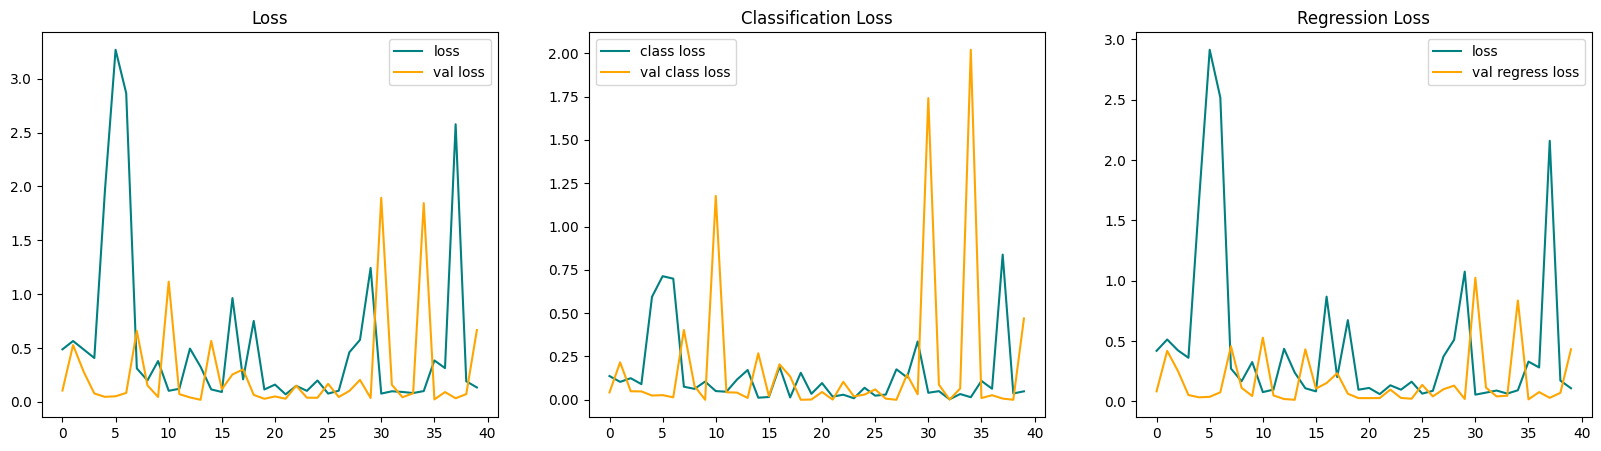

In [188]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

In [ ]:
################## TEST THE MODEL

In [189]:
test_data = test.as_numpy_iterator()



In [199]:
test_sample = test_data.next()

In [200]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..250.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..250.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..250.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..250.0].


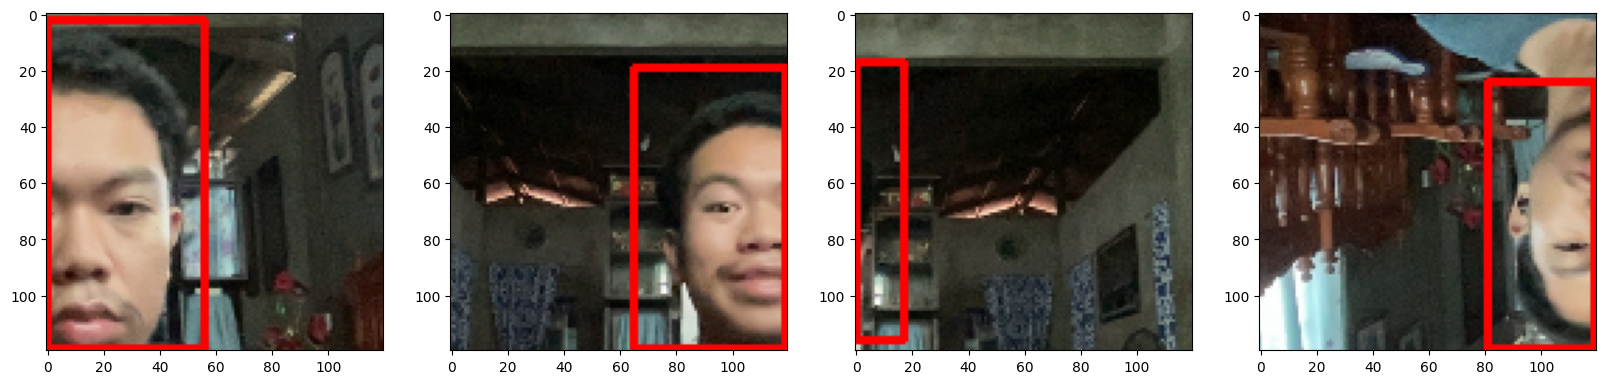

In [201]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                      (250,0,0), 2)
        
    ax[idx].imshow(sample_image)

In [202]:
facetracker.save(os.path.expanduser('~/Desktop/facetracker_vgg16.h5'))